## Linear Regression

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os

try:
    from sklearn.preprocessing import PolynomialFeatures
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse


def make_1dregression_data(n=21, m=20):
    np.random.seed(0)
    xtrain = np.linspace(0.0, 20, n)
    #https://github.com/probml/pml-book/issues/611
    xtest = np.arange(0.0, m, 0.1)
    #xtest = np.arange(0.0, 21, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1 / 9.0])
    fun = lambda x: w[0] * x + w[1] * np.square(x)
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * np.sqrt(sigma2)
    ytest = fun(xtest) + np.random.normal(0, 1, xtest.shape) * np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytest


xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

print()
print("xtrain:", xtrain)
print("ytrain:", ytrain)
print("xtest:", xtest)
print("ytest:", ytest)


# Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
Xtest = scaler.transform(xtest.reshape(-1, 1))


degs = np.arange(1, 21, 1)
ndegs = np.max(degs)
mse_train = np.empty(ndegs)
mse_test = np.empty(ndegs)
ytest_pred_stored = np.empty(ndegs, dtype=np.ndarray)
ytrain_pred_stored = np.empty(ndegs, dtype=np.ndarray)
for deg in degs:
    model = LinearRegression()
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    ytrain_pred_stored[deg - 1] = ytrain_pred
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[deg - 1] = mse(ytrain_pred, ytrain)
    mse_test[deg - 1] = mse(ytest_pred, ytest)
    ytest_pred_stored[deg - 1] = ytest_pred


xtrain: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
ytrain: [ 3.52810469 -0.58857447 -0.59807959  0.9817864  -0.48710624 -6.67677798
 -3.09982316 -5.35826997 -5.09532659 -3.678803   -3.60080175 -0.14700854
 -0.47792455 -0.47887219  1.66550424  3.16734865  7.43260259  6.20079458
  9.6261354   9.90291963  9.33846481]
xtest: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] [ 3.52810469 -0.58857447 -0.59807959  0.9817864  -0.48710624 -6.67677798
 -3.09982316 -5.35826997 -5.09532659 -3.678803   -3.60080175 -0.14700854
 -0.47792455 -0.47887219  1.66550424  3.16734865  7.43260259  6.20079458
  9.6261354   9.90291963  9.33846481]
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]]


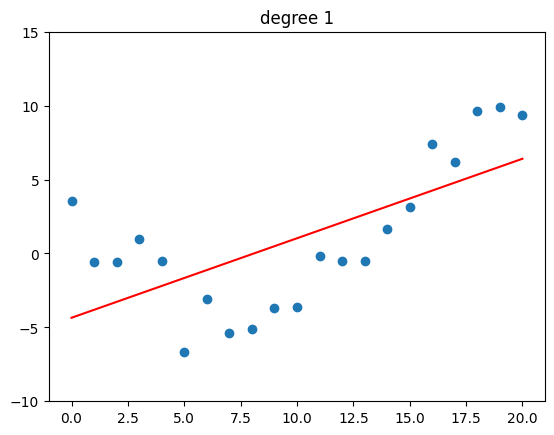

In [41]:
chosen_degs = [1]

for deg in chosen_degs:
    fig, ax = plt.subplots() #figsize=(15, 15))
    ax.scatter(xtrain, ytrain)
    print(xtrain, ytrain)
    x_range = np.linspace(min(xtrain), max(xtrain), 100)
    print(xtrain.reshape(-1, 1))
    model.fit(xtrain.reshape(-1, 1), ytrain)
    y_pred = model.predict(x_range.reshape(-1, 1))
    ax.plot(x_range, y_pred, color='red', label='Regressão Linear')
    ax.set_ylim((-10, 15))
    plt.title("degree {}".format(deg))
    plt.show()

implementing the iterative version.

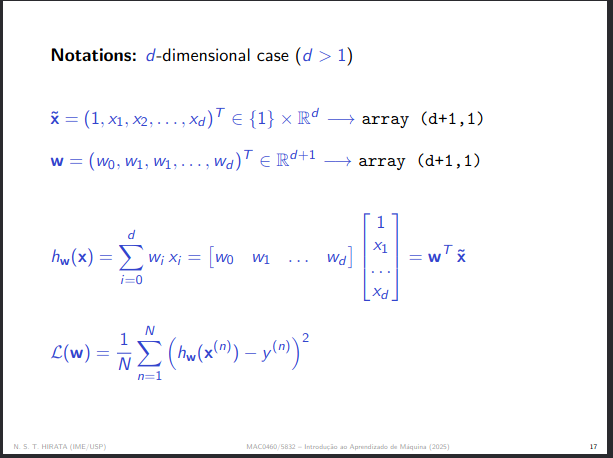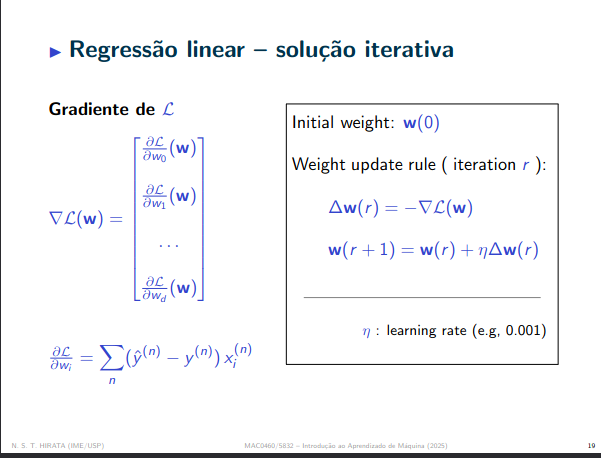

Image fonts are: Nina S. T. Hirata (IME/USP), MAC0460/6832 - Introdução ao Aprendizado de Máquina. Aula02.pdf

In [42]:
from scipy.optimize import minimize, line_search

def stepPart(f, nabla_f, x, d1, step_size=None):
  if step_size is None:
    # Compute a step size using a line_search to satisfy the Wolf
    # conditions
    step = line_search(f, nabla_f, x, d1, c2=0.05)

    #print("passei")
    step = step[0]
    if step is None:
        step = 0
  else:
    step = step_size
  return step


def conjugateGradienteDescent(f, nabla_f, x, step_size=None, max_iter=2000, tol=1e-6):
    g = nabla_f(x)
    d = -g
    for i in range(max_iter):
        alpha = stepPart(f, nabla_f, x, d, step_size)
        #print(alpha)
        # Se o line_search não encontrar um passo adequado, podemos sair ou definir um valor fixo

        # Atualiza o ponto atual
        x_new = x + alpha * d
        g_new = nabla_f(x_new)
        # Critério de parada: se o gradiente estiver pequeno, convergiu
        if np.linalg.norm(g_new) < tol:
            return x_new
        # Atualiza o beta usando a fórmula de Polak-Ribière
        beta = max(0, np.dot(g_new, g_new - g) / np.dot(g, g))
        # Atualiza a direção
        d = -g_new + beta * d
        # Atualiza o ponto e o gradiente para a próxima iteração
        x, g = x_new, g_new
    return x


[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]]
[ 3.52810469 -0.58857447 -0.59807959  0.9817864  -0.48710624 -6.67677798
 -3.09982316 -5.35826997 -5.09532659 -3.678803   -3.60080175 -0.14700854
 -0.47792455 -0.47887219  1.66550424  3.16734865  7.43260259  6.20079458
  9.6261354   9.90291963  9.33846481]
[-4.35089704  0.53773872]


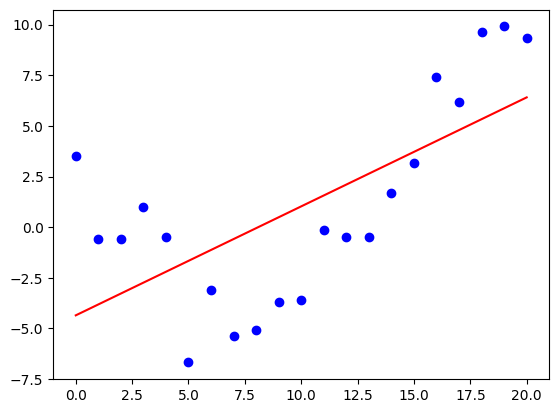

In [72]:
import numpy as np

class my_linear_reg():
  def __init__(self, epochs=2000, learning_rate=0.001):
    self.beta = None
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.y = None
    self.x = None

  #algorithm implemented by description of formula 3.6, page 45, Elements of Statistical Learning, 2ed;  Trevor Hastie , Robert Tibshirani , Jerome Friedman
  def fit_analitic(self, X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    #ones were added for we find the beta_0
    self.beta = np.linalg.inv(np.dot(X.T, X))
    self.beta = np.dot(self.beta, X.T)
    self.beta = np.dot(self.beta, y)

  def fit_iterative(self, X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    self.y = y
    self.x = X
    m, n = X.shape
    self.beta = np.random.randn(X.shape[1])
    for _ in range(self.epochs):
            y_pred = X @ self.beta
            gradient = (2/m) * X.T @ (y_pred - y)
            self.beta -= self.learning_rate * gradient


  #equation 3.3, The elements of Statistical Learning, 2ed.
  def loss_func(self,beta):
    return np.dot((self.y - np.dot(self.x, beta)).T, self.y - np.dot(self.x, beta))

  #equation 3.4, The elements of Statistical Learning, 2ed.
  def gradient(self, beta):

    val = -2 * np.dot(self.x.T, self.y - np.dot(self.x, beta))
    #print(val)
    return -2 * np.dot(self.x.T, self.y - np.dot(self.x, beta))

  def predict(self, X):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred = np.dot(X, self.beta)
    return y_pred

#algorithm implemented by description of formula 3.6, page 45, Elements of Statistical Learning, 2ed;  Trevor Hastie , Robert Tibshirani , Jerome Friedman

xtrain = np.array(xtrain).reshape(-1, 1)
ytrain = np.array(ytrain)

print(xtrain)
print(ytrain)
#print(np.dot(xtrain, xtrain.T))
lr = my_linear_reg()
lr.fit_analitic(xtrain, ytrain)
print(lr.beta)

fig, ax = plt.subplots() #figsize=(15, 15))
ax.scatter(xtrain, ytrain, color='blue', label='Dados de Treino')

x_range = np.linspace(min(xtrain), max(xtrain), 100)
y_pred = lr.predict(x_range)
ax.plot(x_range, y_pred, color='red', label='Regressão Linear')

[-3.45162427  0.47180954]


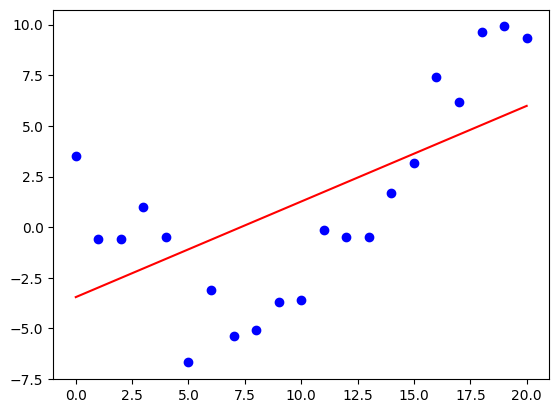

In [76]:
lr = my_linear_reg()
lr.fit_iterative(xtrain, ytrain)
print(lr.beta)

fig, ax = plt.subplots() #figsize=(15, 15))
ax.scatter(xtrain, ytrain, color='blue', label='Dados de Treino')

x_range = np.linspace(min(xtrain), max(xtrain), 100)
y_pred = lr.predict(x_range)
ax.plot(x_range, y_pred, color='red', label='Regressão Linear')

Testing My Linear Regression

In [46]:
!unzip archive.zip


Archive:  archive.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [47]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split

df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


[40547.19560996  -379.17304016 40018.22585342]
0.03372669219970703


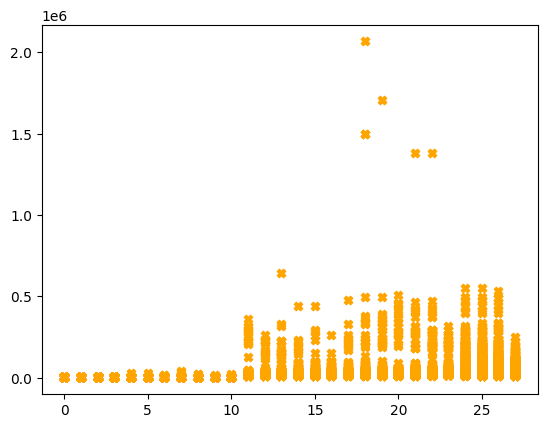

In [48]:
df_test = pd.DataFrame()
df_test["MSRP"] = df["MSRP"]
df_test["Year"] = df["Year"]
df_test["Engine HP"] = df["Engine HP"]
df_test["Year"] = df_test["Year"].apply(lambda x: x - df_test["Year"].min())

df_test = df_test.sort_values(by="Year")
df_test
df_test = df_test.dropna()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_test[['Year', 'Engine HP']].values)

plt.scatter(df_test["Year"], df_test["MSRP"], marker="X", c="orange")

lr = my_linear_reg()
prev = time()
#print(df_test[['Year', 'Engine HP']].values)
lr.fit_analitic(X_scaled, df_test["MSRP"].to_numpy())
print(lr.beta)
x_range = np.linspace(min(df_test["Year"]), max(df_test["Year"]), 100)
#print(x_range)
#y_pred = lr.predict(x_range.reshape(-1, 1))
print(time() - prev)
#plt.plot(x_range, y_pred, color='red', label='Regressão Linear')
#plt.scatter(df_test["Year"], df_test["MSRP"], marker="X", c="orange")

[39807.51758007  1041.09105502 38421.50745645]
0.5883936882019043


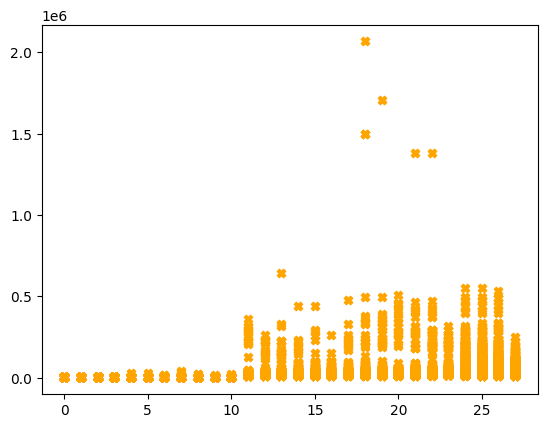

In [49]:
plt.scatter(df_test["Year"], df_test["MSRP"], marker="X", c="orange")
lr = my_linear_reg()
prev = time()
df_test = df_test.dropna()
lr.fit_iterative(X_scaled, df_test["MSRP"].to_numpy())
print(lr.beta)
#x_range = np.linspace(min(df_test["Year"]), max(df_test["Year"]), 100)
#y_pred = lr.predict(x_range)
print(time() - prev)
#plt.plot(x_range, y_pred, color='red', label='Regressão Linear')

## Ridge regressiom

In [51]:
string = str([float(i) for i in range(1, 21)])
string.replace("[", "")
string.replace("]", "")
string.replace("\n", " ")

string = """3.52810469 -0.58857447 -0.59807959  0.9817864  -0.48710624 -6.67677798
 -3.09982316 -5.35826997 -5.09532659 -3.678803   -3.60080175 -0.14700854
 -0.47792455 -0.47887219  1.66550424  3.16734865  7.43260259  6.20079458
  9.6261354   9.90291963  9.33846481"""

def format_as_cpp_array(input_str):
    # Remove colchetes e divide os números
    numbers = [float(num) for num in input_str.strip().replace("\n", " ").split()]

    # Formata a saída como um vetor de C++
    cpp_array = "std::vector<double> data = {" + ", ".join(f"{num:.8f}" for num in numbers) + "};"

    return cpp_array

string = format_as_cpp_array(string)
string


'std::vector<double> data = {3.52810469, -0.58857447, -0.59807959, 0.98178640, -0.48710624, -6.67677798, -3.09982316, -5.35826997, -5.09532659, -3.67880300, -3.60080175, -0.14700854, -0.47792455, -0.47887219, 1.66550424, 3.16734865, 7.43260259, 6.20079458, 9.62613540, 9.90291963, 9.33846481};'

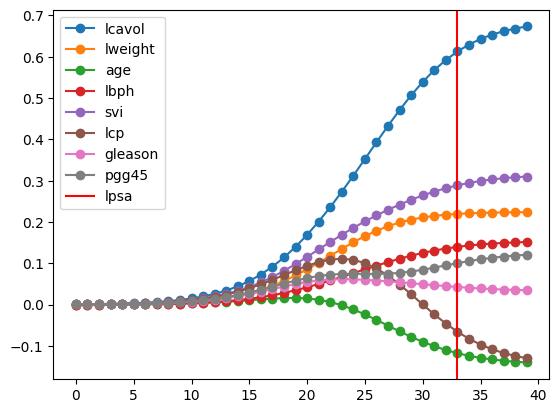

In [52]:
#source: https://github.com/probml/pyprobml/blob/master/notebooks/book1/11/ridgePathProstate.ipynb

try:
    from sklearn import linear_model
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import requests
from io import BytesIO
from scipy.io import loadmat

# Load prostate cancer data
#!wget https://github.com/probml/probml-data/blob/main/data/prostateStnd.mat?raw=true -O prostateStnd.mat

# matlab data is created by this
# https://github.com/probml/pmtk3/blob/master/data/prostate/prostateDataMake.m

# data = loadmat('prostateStnd.mat')

url = "https://raw.githubusercontent.com/probml/probml-data/main/data/prostateStnd.mat"
response = requests.get(url)
# rawdata = response.text
rawdata = BytesIO(response.content)
data = loadmat(rawdata)


names = list(map(lambda x: x[0], data["names"][0]))
X, y = data["X"], data["y"]

# Ridge regression

n_alpha = 40
alphas = np.logspace(5, 0, n_alpha)

coefs = map(lambda a: linear_model.Ridge(a).fit(X, y).coef_.flatten(), alphas)
coefs = np.array(list(coefs))

#print(coefs)

# Ridge regression with cross validation

best_model = linear_model.RidgeCV(alphas)
b = best_model.fit(X, y)

# Figure 11.12 (a)
# Profile of ridge coeficients for prostate cancer example
# Vertical line is values chosen by cross validation

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alphas == best_model.alpha_), c="r")
plt.legend(names)

plt.show()

In [53]:
x_test = data["Xtest"]
y_test = data["ytest"]
print(len(X))

97


In [54]:
alphas

array([1.00000000e+05, 7.44380301e+04, 5.54102033e+04, 4.12462638e+04,
       3.07029063e+04, 2.28546386e+04, 1.70125428e+04, 1.26638017e+04,
       9.42668455e+03, 7.01703829e+03, 5.22334507e+03, 3.88815518e+03,
       2.89426612e+03, 2.15443469e+03, 1.60371874e+03, 1.19377664e+03,
       8.88623816e+02, 6.61474064e+02, 4.92388263e+02, 3.66524124e+02,
       2.72833338e+02, 2.03091762e+02, 1.51177507e+02, 1.12533558e+02,
       8.37677640e+01, 6.23550734e+01, 4.64158883e+01, 3.45510729e+01,
       2.57191381e+01, 1.91448198e+01, 1.42510267e+01, 1.06081836e+01,
       7.89652287e+00, 5.87801607e+00, 4.37547938e+00, 3.25702066e+00,
       2.42446202e+00, 1.80472177e+00, 1.34339933e+00, 1.00000000e+00])

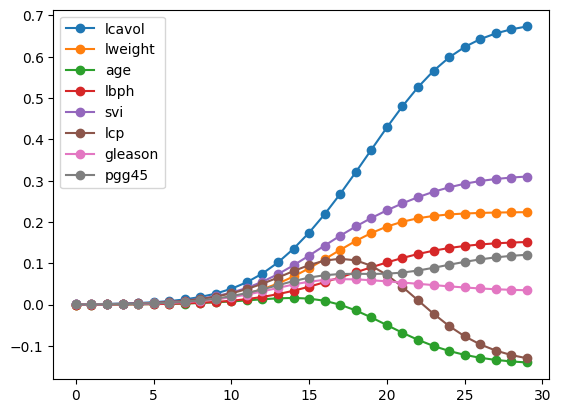

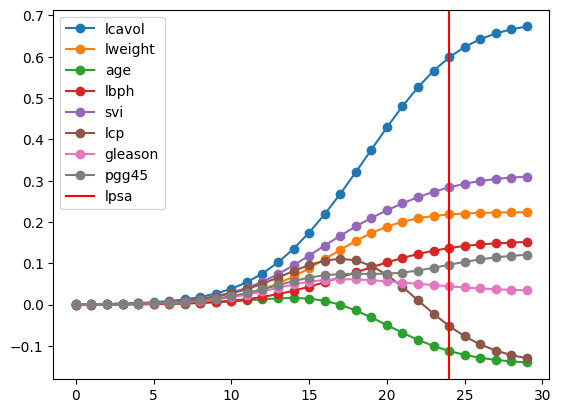

In [55]:
#algorithm implemented by description of formula 3.44, page 64, Elements of Statistical Learning, 2ed;  Trevor Hastie , Robert Tibshirani , Jerome Friedman

def my_ridge_reg(X, y, lam):
  #X = np.c_[np.ones((X.shape[0], 1)), X]
  beta = np.dot(X.T, X)
  beta = beta + lam*np.eye(beta.shape[0], beta.shape[0])
  beta = np.linalg.inv(beta)
  beta = np.dot(beta, X.T)
  beta = np.dot(beta, y)

  return beta


n_alpha = 30
alphas = np.logspace(5, 0, n_alpha)



for i in range(0, 8):
  coefs = map(lambda a: my_ridge_reg(X, y, a)[i], alphas)
  coefs = np.array(list(coefs))
  plt.plot(coefs, marker="o")

plt.legend(names)

plt.show()

names = list(map(lambda x: x[0], data["names"][0]))
X, y = data["X"], data["y"]


# Ridge regression

n_alpha = 30
alphas = np.logspace(5, 0, n_alpha)

coefs = map(lambda a: linear_model.Ridge(a).fit(X, y).coef_.flatten(), alphas)
coefs = np.array(list(coefs))


# Ridge regression with cross validation

best_model = linear_model.RidgeCV(alphas)
b = best_model.fit(X, y)

# Figure 11.12 (a)
# Profile of ridge coeficients for prostate cancer example
# Vertical line is values chosen by cross validation

fig, ax = plt.subplots()
plt.plot(coefs, marker="o")
plt.axvline(x=np.where(alphas == best_model.alpha_), c="r")
plt.legend(names)

plt.show()

30
1


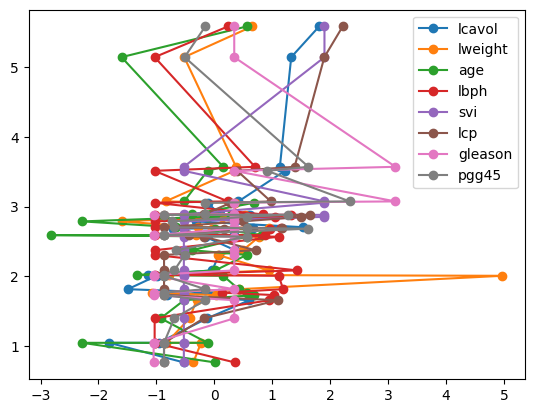

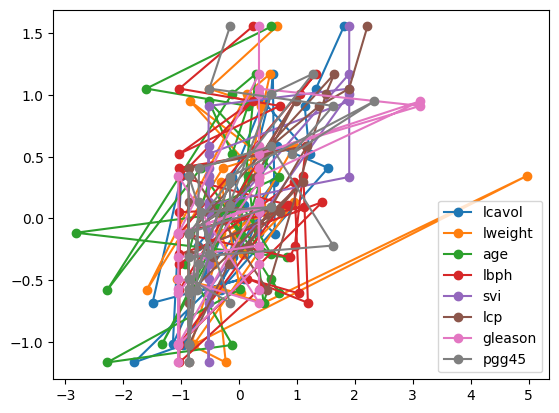

In [56]:
beta_lma_24 = my_ridge_reg(X, y, 24)
y_pred = np.dot(x_test,beta_lma_24)

print(len(x_test))
print(len(y_pred[0]))

#plt.plot(x_test, y_pred)
plt.plot(x_test, y_test, marker="o")
plt.legend(names)
plt.show()

plt.plot(x_test, y_pred, marker="o")
plt.legend(names)
plt.show()
#plt.plot

In [57]:
erro = []

for i in range(0, len(y_pred)):
   y_pred[i] = y_pred[i][0]
   y_test[i] = y_test[i][0]


for i in range(0, len(y_pred)):
  erro.append((y_pred[i] - y_test[i]))

#print(y_pred)
#print(y_test)
erro

print("std: ", np.std(erro))
print("mean: ", np.mean(erro))

std:  0.6548202041693786
mean:  -2.471499703133008


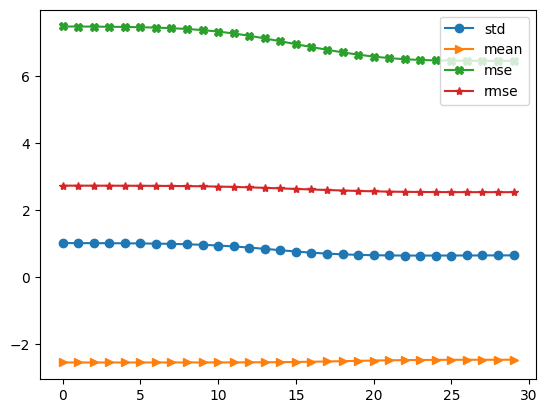

In [58]:
from sklearn.metrics import mean_squared_error

erro = []
rmse = []
mse = []


for p in range(0,len(alphas)):
  beta_lma_24 = my_ridge_reg(X, y, alphas[p])
  y_pred = np.dot(x_test,beta_lma_24)
  erro.append([])
  #MSE = Σ(ŷi – yi)^2 / n
  mse.append(mean_squared_error(y_test, y_pred))
  rmse.append(mse[p] ** 0.5)
  for i in range(0, len(y_pred)):
    erro[p].append((y_pred[i] - y_test[i]))

std = []
mean = []

for i in erro:
  std.append(np.std(i))
  mean.append(np.mean(i))

plt.plot(std, marker="o")
plt.plot(mean, marker=">")
plt.plot(mse, marker="X")
plt.plot(rmse, marker="*")


plt.legend(["std", "mean", "mse", "rmse"])
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 6.455427682218229
RMSE: 2.540753369026248


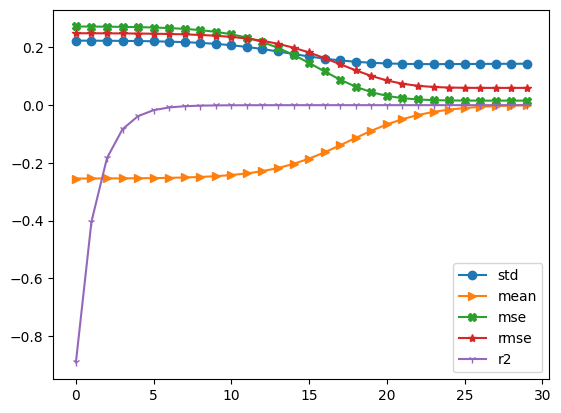

In [60]:
#with intercepto

def my_ridge_reg(X, y, lam):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  beta = np.dot(X.T, X)
  beta = beta + lam*np.eye(beta.shape[0], beta.shape[0])
  beta = np.linalg.inv(beta)
  beta = np.dot(beta, X.T)
  beta = np.dot(beta, y)

  return beta


from sklearn.metrics import mean_squared_error, r2_score

erro = []
rmse = []
mse = []
r2 = []

last_y = 0

for p in range(0,len(alphas)):
  beta_lma_24 = my_ridge_reg(X, y, alphas[p])
  y_pred = np.dot(x_test,beta_lma_24[1:]) + beta_lma_24[0]
  erro.append([])
  #MSE = Σ(ŷi – yi)^2 / n
  mse.append(mean_squared_error(y_test, y_pred))
  rmse.append(mse[p] ** 0.5)
  r2.append(r2_score(y_pred, y_test))
  for i in range(0, len(y_pred)):
    erro[p].append((y_pred[i] - y_test[i]))

  last_y = y_pred

std = []
mean = []

for i in erro:
  std.append(np.std(i))
  mean.append(np.mean(i))

def normalize(l):
  norm = np.linalg.norm(l)
  if norm == 0:
    return l
  return l/norm

r2 = normalize(r2)
std = normalize(std)
mean = normalize(mean)
mse = normalize(mse)
rmse = normalize(rmse)
plt.plot(std, marker="o")
plt.plot(mean, marker=">")
plt.plot(mse, marker="X")
plt.plot(rmse, marker="*")
plt.plot(r2, marker="1")

plt.legend(["std", "mean", "mse", "rmse", "r2"])
plt.show()

A presença do intercepto foi essencial

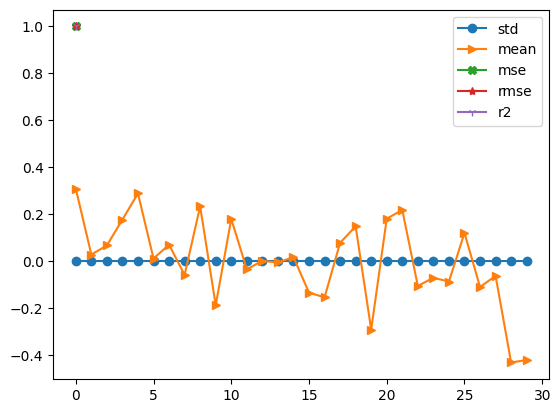

In [61]:
erro = []
rmse = []
mse = []
r2 = []

const = my_linear_reg(X, y)


  #MSE = Σ(ŷi – yi)^2 / n
mse.append(mean_squared_error(y_test, y_pred))
rmse.append(mse[0] ** 0.5)
r2.append(r2_score(y_pred, y_test))
for i in range(0, len(y_pred)):
  erro.append((y_pred[i] - y_test[i]))

const = my_linear_reg(X, y)
std = []
mean = []

for i in erro:
  std.append(np.std(i))
  mean.append(np.mean(i))

def normalize(l):
  norm = np.linalg.norm(l)
  if norm == 0:
    return l
  return l/norm

r2 = normalize(r2)
std = normalize(std)
mean = normalize(mean)
mse = normalize(mse)
rmse = normalize(rmse)
plt.plot(std, marker="o")
plt.plot(mean, marker=">")
plt.plot(mse, marker="X")
plt.plot(rmse, marker="*")
plt.plot(r2, marker="1")

plt.legend(["std", "mean", "mse", "rmse", "r2"])
plt.show()


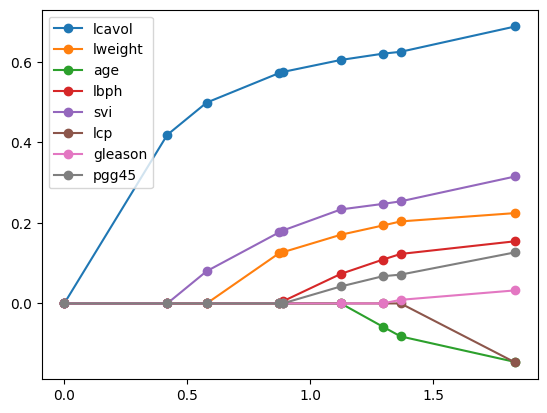

In [62]:

from scipy.io import loadmat

try:
    from sklearn import linear_model
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests
from io import BytesIO

# Load prostate cancer data
url = "https://github.com/probml/probml-data/blob/main/data/prostate/prostateStnd.mat?raw=true"
response = requests.get(url)
rawdata = BytesIO(response.content)
data = loadmat(rawdata)

names = list(map(lambda x: x[0], data["names"][0]))
X, y = data["X"], data["y"]

# Finding coefficients for lasso path

_, _, coefs = linear_model.lars_path(X, y.flatten(), method="lasso")

tau = np.sum(np.abs(coefs.T), axis=1)

# Figure 11.12 (b)
# Profile of lasso coeficients for prostate cancer example

fig, ax = plt.subplots()
xs = tau
ys = coefs.T
plt.xlabel(r"")
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.plot(xs, ys, marker="o")
plt.legend(names)
plt.show()

In [63]:
def my_lasso_reg(X, y):
  pass